<a href="https://colab.research.google.com/github/katdask/Data_Science_Projects/blob/main/Unzip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!unzip -u "/content/drive/My Drive/facial_attributes/archive (1).zip" -d "/content/drive/My Drive/facial_attributes/data"

In [2]:
%cd /content/drive/My Drive/facial_attributes/

/content/drive/My Drive/facial_attributes


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load and prepare data

In [4]:
celebs=pd.read_csv("list_attr_celeba.csv")
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [5]:
celebs["image_id"]='data/img_align_celeba/img_align_celeba/' + celebs["image_id"].astype(str)
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,data/img_align_celeba/img_align_celeba/000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,data/img_align_celeba/img_align_celeba/000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,data/img_align_celeba/img_align_celeba/000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,data/img_align_celeba/img_align_celeba/000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,data/img_align_celeba/img_align_celeba/000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
celebs.replace(-1, 0, inplace=True)
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,data/img_align_celeba/img_align_celeba/000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,data/img_align_celeba/img_align_celeba/000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,data/img_align_celeba/img_align_celeba/000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,data/img_align_celeba/img_align_celeba/000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
4,data/img_align_celeba/img_align_celeba/000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [7]:
img=mpimg.imread(celebs["image_id"][0])
img.shape

(218, 178, 3)

In [8]:
img_crop=img[20:198,:,:]
img_crop.shape

(178, 178, 3)

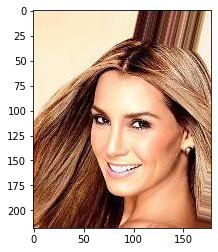

In [9]:
plt.imshow(img)

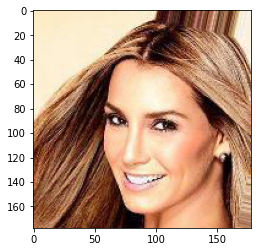

In [10]:
plt.imshow(img_crop)

In [7]:
my_list=[]
for i in range(5000):
    img=mpimg.imread(celebs["image_id"][i])
    img=img[20:198,:,:]
    my_list.append(img/255)

In [24]:
y=celebs.loc[:4999,['Male', 'Young', 'Attractive', 'Smiling', 'Heavy_Makeup',
                    'High_Cheekbones', 'Narrow_Eyes', 'Pale_Skin', 'Oval_Face', 
                    'Straight_Hair', 'Wavy_Hair', 'Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair']]
y.groupby('Oval_Face').size()

Oval_Face
0    3648
1    1352
dtype: int64

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(np.array(my_list), y, test_size=0.20, random_state=82)

my_list=[]

In [10]:
X_train.shape

(4000, 178, 178, 3)

In [11]:
# create test set
new_list=[]
for i in range(1000):
    img=mpimg.imread(celebs["image_id"][5000+i])
    img=img[20:198,:,:]
    new_list.append(img/255)

X_test = np.array(new_list)

new_list=[]

y_test = celebs.loc[5000:5999,['Male', 'Young', 'Attractive', 'Smiling', 'Heavy_Makeup',
                               'High_Cheekbones', 'Narrow_Eyes', 'Pale_Skin', 'Oval_Face', 
                               'Straight_Hair', 'Wavy_Hair', 'Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair']]

In [13]:
X_test.shape

(1000, 178, 178, 3)

In [14]:
y_test.shape

(1000, 9)

### Build Models for Binary Classification of several Facial Attributes

In [15]:
# Create checkpoint2 directory (if not exist) to store best models

import os
try:
    os.mkdir('checkpoint2')
except:
    pass

#### Binary Classification for Attribute Male

In [48]:
# male_model to classify binaty attrubute "male"

layer_male1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_male2 = keras.layers.MaxPooling2D(2,2)
layer_male3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_male4 = keras.layers.MaxPooling2D(2,2)
layer_male5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_male6 = keras.layers.MaxPooling2D(2,2)
layer_male7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_male8 = keras.layers.MaxPooling2D(2,2)
layer_male9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_male10 = keras.layers.MaxPooling2D(2,2)
layer_male11 = keras.layers.Flatten()
layer_male12 = keras.layers.Dense(1000, activation="relu")
layer_male13 = keras.layers.Dense(256, activation="relu")
layer_male14 = keras.layers.Dense(2, activation="softmax")

male_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_male1, layer_male2, layer_male3, layer_male4, layer_male5, 
                              layer_male6, layer_male7, layer_male8, layer_male9, layer_male10, layer_male11, layer_male12, 
                              layer_male13, layer_male14])

male_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 18, 18, 256)      

In [49]:
# Create y_male train-validation-tests sets for classification task "Male"

y_male_train=y_train["Male"]
y_male_valid=y_valid["Male"]
y_male_test=y_test["Male"]

In [51]:
# We specify the training configuration (optimizer, loss, metrics):
male_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [52]:
# Call_back to store best model
file_name = 'best_model_male.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [53]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = male_model.fit(
    X_train,
    y_male_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_valid, y_male_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
32/32 [==============================] - 6s 168ms/step - loss: 0.8889 - sparse_categorical_accuracy: 0.5650 - val_loss: 0.6811 - val_sparse_categorical_accuracy: 0.5870

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.58700, saving model to checkpoint2/best_model_male.h5
Epoch 2/30
32/32 [==============================] - 5s 142ms/step - loss: 0.6993 - sparse_categorical_accuracy: 0.5830 - val_loss: 0.6909 - val_sparse_categorical_accuracy: 0.5400

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.58700
Epoch 3/30
32/32 [==============================] - 4s 140ms/step - loss: 0.6591 - sparse_categorical_accuracy: 0.6110 - val_loss: 0.6148 - val_sparse_categorical_accuracy: 0.6250

Epoch 00003: val_sparse_categorical_accuracy improved from 0.58700 to 0.62500, saving model to checkpoint2/best_model_male.h5
Epoch 4/30
32/32 [==============================] - 5s 143ms/step - loss: 0.5882 - sparse_categorical_accur

In [54]:
# Final Evaluation on test data

male_model.load_weights(checkpoint_path)
print("Evaluate on test data")
results = male_model.evaluate(X_test, y_male_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 16ms/step - loss: 0.5444 - sparse_categorical_accuracy: 0.9340
test loss, test acc: [0.544408917427063, 0.9340000152587891]


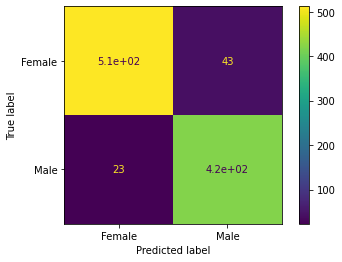

In [56]:
pred = male_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_male_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Female", "Male"])
disp.plot() 

#### Binary Classification for Attribute "Young"

In [17]:
# young_model to classify binary attrubute "young"

layer_young1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_young2 = keras.layers.MaxPooling2D(2,2)
layer_young3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_youngd3 = keras.layers.Dropout(0.2)
layer_young4 = keras.layers.MaxPooling2D(2,2)
layer_young5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_youngd5 = keras.layers.Dropout(0.2)
layer_young6 = keras.layers.MaxPooling2D(2,2)
layer_young7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_youngd7 = keras.layers.Dropout(0.2)
layer_young8 = keras.layers.MaxPooling2D(2,2)
layer_young9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_youngd9 = keras.layers.Dropout(0.2)
layer_young10 = keras.layers.MaxPooling2D(2,2)
layer_young11 = keras.layers.Flatten()
layer_young12 = keras.layers.Dense(1000, activation="relu")
layer_youngd12 = keras.layers.Dropout(0.3)
layer_young13 = keras.layers.Dense(256, activation="relu")
layer_youngd13 = keras.layers.Dropout(0.2)
layer_young14 = keras.layers.Dense(2, activation="softmax")

young_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_young1, layer_young2, layer_young3, layer_youngd3, layer_young4, 
                              layer_young5, layer_youngd5, layer_young6, layer_young7, layer_youngd7, layer_young8, layer_young9, layer_youngd9, 
                              layer_young10, layer_young11, layer_young12, layer_youngd12, layer_young13, layer_youngd13, layer_young14])

young_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 41, 41, 128)      

In [18]:
# Create y_young train-validation-tests sets for classification task "Young"

y_young_train=y_train["Young"]
y_young_valid=y_valid["Young"]
y_young_test=y_test["Young"]

In [19]:
# We specify the training configuration (optimizer, loss, metrics):
young_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [20]:
# Call_back to store best model
file_name = 'best_model_young.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [21]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = young_model.fit(
    X_train,
    y_young_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_young_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 40s 115ms/step - loss: 0.5760 - sparse_categorical_accuracy: 0.7843 - val_loss: 0.5765 - val_sparse_categorical_accuracy: 0.7690

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.76900, saving model to checkpoint2/best_model_young.h5
Epoch 2/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5155 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5260 - val_sparse_categorical_accuracy: 0.7690

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.76900
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5021 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5161 - val_sparse_categorical_accuracy: 0.7690

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.76900
Epoch 4/30
63/63 [==============================] - 6s 89ms/step - loss: 0.4865 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5154 - val_sparse_categoric

In [22]:
# Final Evaluation on test data

young_model.load_weights(checkpoint_path)
print("Evaluate on test data")
results = young_model.evaluate(X_test, y_young_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 23ms/step - loss: 0.4472 - sparse_categorical_accuracy: 0.8040
test loss, test acc: [0.4471667408943176, 0.8040000200271606]


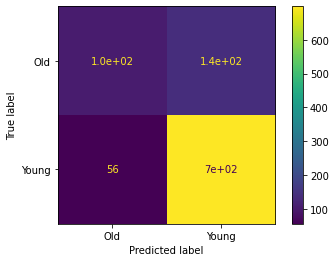

In [23]:
pred = young_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_young_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Old", "Young"])
disp.plot() 

#### Binary Classification for the Attribute "Smiling"

In [24]:
# smile_model to classify binaty attrubute "Smiling"

layer_smile1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_smile2 = keras.layers.MaxPooling2D(2,2)
layer_smile3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_smiled3 = keras.layers.Dropout(0.2)
layer_smile4 = keras.layers.MaxPooling2D(2,2)
layer_smile5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_smiled5 = keras.layers.Dropout(0.2)
layer_smile6 = keras.layers.MaxPooling2D(2,2)
layer_smile7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_smiled7 = keras.layers.Dropout(0.2)
layer_smile8 = keras.layers.MaxPooling2D(2,2)
layer_smile9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_smiled9 = keras.layers.Dropout(0.2)
layer_smile10 = keras.layers.MaxPooling2D(2,2)
layer_smile11 = keras.layers.Flatten()
layer_smile12 = keras.layers.Dense(1000, activation="relu")
layer_smiled12 = keras.layers.Dropout(0.3)
layer_smile13 = keras.layers.Dense(256, activation="relu")
layer_smiled13 = keras.layers.Dropout(0.3)
layer_smile14 = keras.layers.Dense(2, activation="softmax")

                            
smile_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_smile1, layer_smile2, layer_smile3, layer_smiled3, layer_smile4, 
                                layer_smile5, layer_smiled5, layer_smile6, layer_smile7,layer_smiled7, layer_smile8, layer_smile9,
                                layer_smiled9, layer_smile10, layer_smile11, layer_smile12, layer_smiled12, layer_smile13, 
                                layer_smiled13, layer_smile14])

smile_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 41, 41, 128)      

In [25]:
# Create y_smile train-validation-tests sets for classification task "Smiling"

y_smile_train=y_train["Smiling"]
y_smile_valid=y_valid["Smiling"]
y_smile_test=y_test["Smiling"]

In [26]:
# We specify the training configuration (optimizer, loss, metrics):
smile_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [28]:
# Call_back to store best model
file_name = 'best_model_smile.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [29]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = smile_model.fit(
    X_train,
    y_smile_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_smile_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 8s 100ms/step - loss: 3.4485 - sparse_categorical_accuracy: 0.5117 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5080

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.50800, saving model to checkpoint2/best_model_smile.h5
Epoch 2/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7227 - sparse_categorical_accuracy: 0.5245 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5080

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.50800
Epoch 3/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7013 - sparse_categorical_accuracy: 0.5278 - val_loss: 0.6916 - val_sparse_categorical_accuracy: 0.5330

Epoch 00003: val_sparse_categorical_accuracy improved from 0.50800 to 0.53300, saving model to checkpoint2/best_model_smile.h5
Epoch 4/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7082 - sparse_categorical_accura

In [30]:
# Final Evaluation on test data
smile_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = smile_model.evaluate(X_test, y_smile_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 16ms/step - loss: 0.2569 - sparse_categorical_accuracy: 0.8870
test loss, test acc: [0.2569214403629303, 0.8870000243186951]


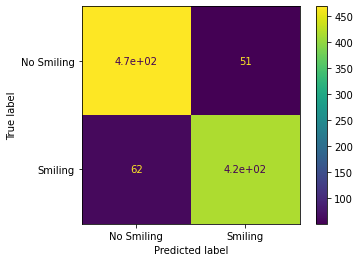

In [31]:
pred = smile_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_smile_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Smiling", "Smiling"])
disp.plot()

#### Binary Classification for Attribute "Attractive"

In [17]:
# attr_model to classify binaty attribute "Attractive"

layer_attr1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_attr2 = keras.layers.MaxPooling2D(2,2)
layer_attr3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_attrd3 = keras.layers.Dropout(0.2)
layer_attr4 = keras.layers.MaxPooling2D(2,2)
layer_attr5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_attrd5 = keras.layers.Dropout(0.2)
layer_attr6 = keras.layers.MaxPooling2D(2,2)
layer_attr7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_attrd7 = keras.layers.Dropout(0.2)
layer_attr8 = keras.layers.MaxPooling2D(2,2)
layer_attr9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_attrd9 = keras.layers.Dropout(0.2)
layer_attr10 = keras.layers.MaxPooling2D(2,2)
layer_attr11 = keras.layers.Flatten()
layer_attr12 = keras.layers.Dense(1000, activation="relu")
layer_attrd12 = keras.layers.Dropout(0.3)
layer_attr13 = keras.layers.Dense(256, activation="relu")
layer_attrd13 = keras.layers.Dropout(0.3)
layer_attr14 = keras.layers.Dense(2, activation="softmax")

                            
attr_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_attr1, layer_attr2, layer_attr3, layer_attrd3, layer_attr4, 
                                layer_attr5, layer_attrd5, layer_attr6, layer_attr7,layer_attrd7, layer_attr8, layer_attr9,
                                layer_attrd9, layer_attr10, layer_attr11, layer_attr12, layer_attrd12, layer_attr13, 
                                layer_attrd13, layer_attr14])

attr_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 41, 41, 128)      

In [18]:
# Create y_attr train-validation-tests sets for classification task "Attractive"

y_attr_train=y_train["Attractive"]
y_attr_valid=y_valid["Attractive"]
y_attr_test=y_test["Attractive"]

In [19]:
# We specify the training configuration (optimizer, loss, metrics):
attr_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [20]:
# Call_back to store best model
file_name = 'best_model_attr.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [21]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = attr_model.fit(
    X_train,
    y_attr_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_attr_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 40s 118ms/step - loss: 0.7069 - sparse_categorical_accuracy: 0.5160 - val_loss: 0.6826 - val_sparse_categorical_accuracy: 0.5150

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.51500, saving model to checkpoint2/best_model_attr.h5
Epoch 2/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6507 - sparse_categorical_accuracy: 0.6292 - val_loss: 0.6433 - val_sparse_categorical_accuracy: 0.6310

Epoch 00002: val_sparse_categorical_accuracy improved from 0.51500 to 0.63100, saving model to checkpoint2/best_model_attr.h5
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6047 - sparse_categorical_accuracy: 0.6795 - val_loss: 0.6125 - val_sparse_categorical_accuracy: 0.6790

Epoch 00003: val_sparse_categorical_accuracy improved from 0.63100 to 0.67900, saving model to checkpoint2/best_model_attr.h5
Epoch 4/30
63/63 [==============================] - 6s 9

In [22]:
# Final Evaluation on test data
attr_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = attr_model.evaluate(X_test, y_attr_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 28ms/step - loss: 0.5107 - sparse_categorical_accuracy: 0.7530
test loss, test acc: [0.5106688737869263, 0.753000020980835]


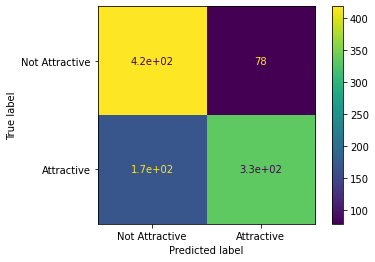

In [23]:
pred = attr_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_attr_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Attractive", "Attractive"])
disp.plot()

#### Classification for attribute "Heavy_Makeup"

In [31]:
# hm_model to classify binaty attribute "Heavy_Makeup"

layer_hm1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_hm2 = keras.layers.MaxPooling2D(2,2)
layer_hm3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_hmd3 = keras.layers.Dropout(0.2)
layer_hm4 = keras.layers.MaxPooling2D(2,2)
layer_hm5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_hmd5 = keras.layers.Dropout(0.2)
layer_hm6 = keras.layers.MaxPooling2D(2,2)
layer_hm7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_hmd7 = keras.layers.Dropout(0.2)
layer_hm8 = keras.layers.MaxPooling2D(2,2)
layer_hm9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_hmd9 = keras.layers.Dropout(0.2)
layer_hm10 = keras.layers.MaxPooling2D(2,2)
layer_hm11 = keras.layers.Flatten()
layer_hm12 = keras.layers.Dense(1000, activation="relu")
layer_hmd12 = keras.layers.Dropout(0.3)
layer_hm13 = keras.layers.Dense(256, activation="relu")
layer_hmd13 = keras.layers.Dropout(0.3)
layer_hm14 = keras.layers.Dense(2, activation="softmax")

                            
hm_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_hm1, layer_hm2, layer_hm3, layer_hmd3, layer_hm4, 
                                layer_hm5, layer_hmd5, layer_hm6, layer_hm7,layer_hmd7, layer_hm8, layer_hm9,
                                layer_hmd9, layer_hm10, layer_hm11, layer_hm12, layer_hmd12, layer_hm13, 
                                layer_hmd13, layer_hm14])

hm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_24 (Dropout)         (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_25 (Dropout)         (None, 41, 41, 128)      

In [32]:
# Create y_hm train-validation-tests sets for classification task "Heavy_Makeup"

y_hm_train=y_train["Heavy_Makeup"]
y_hm_valid=y_valid["Heavy_Makeup"]
y_hm_test=y_test["Heavy_Makeup"]

In [33]:
# We specify the training configuration (optimizer, loss, metrics):
hm_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [34]:
# Call_back to store best model
file_name = 'best_model_hm.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [35]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = hm_model.fit(
    X_train,
    y_hm_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_valid, y_hm_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/50
63/63 [==============================] - 7s 97ms/step - loss: 1.1577 - sparse_categorical_accuracy: 0.6075 - val_loss: 0.6550 - val_sparse_categorical_accuracy: 0.6250

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.62500, saving model to checkpoint2/best_model_hm.h5
Epoch 2/50
63/63 [==============================] - 6s 90ms/step - loss: 0.6794 - sparse_categorical_accuracy: 0.6025 - val_loss: 0.6661 - val_sparse_categorical_accuracy: 0.6250

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.62500
Epoch 3/50
63/63 [==============================] - 6s 91ms/step - loss: 0.6440 - sparse_categorical_accuracy: 0.6565 - val_loss: 0.5726 - val_sparse_categorical_accuracy: 0.7160

Epoch 00003: val_sparse_categorical_accuracy improved from 0.62500 to 0.71600, saving model to checkpoint2/best_model_hm.h5
Epoch 4/50
63/63 [==============================] - 6s 90ms/step - loss: 0.5718 - sparse_categorical_accuracy: 0.7

In [36]:
# Final Evaluation on test data
hm_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = hm_model.evaluate(X_test, y_hm_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 16ms/step - loss: 0.2686 - sparse_categorical_accuracy: 0.8870
test loss, test acc: [0.26861581206321716, 0.8870000243186951]


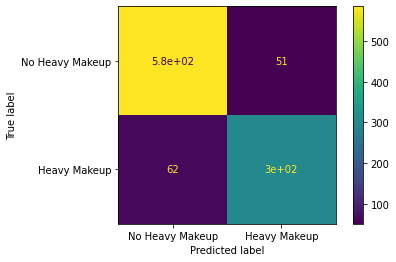

In [37]:
pred = hm_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_hm_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heavy Makeup", "Heavy Makeup"])
disp.plot()

In [39]:
# "Freeze" model layers to by used for transfer learning
layer_hm1.trainable = False
layer_hm2.trainable = False
layer_hm3.trainable = False
layer_hmd3.trainable = False
layer_hm4.trainable = False
layer_hm5.trainable = False
layer_hmd5.trainable = False
layer_hm6.trainable = False
layer_hm7.trainable = False
layer_hmd7.trainable = False
layer_hm8.trainable = False
layer_hm9.trainable = False
layer_hmd9.trainable = False
layer_hm10.trainable = False
layer_hm11.trainable = False
layer_hm12.trainable = False
layer_hmd12.trainable = False

### Transfer Learning 

In [ ]:
# Create y_ps train-validation-tests sets for classification task for "Pale_Skin" Attribute (very imbalanced)
# transfer learning utilizing model trained for attribute "Heavy_Makeup"

y_ps_train=y_train["Pale_Skin"]
y_ps_valid=y_valid["Pale_Skin"]
y_ps_test=y_test["Pale_Skin"]

In [ ]:
# Build a model from the pre-trained layers of "hm_model" and adding 2 Dense & 1 Prediction Layer
tl_ps_model = keras.Sequential([keras.Input(shape=(178, 178, 3)), 
                                layer_hm1, layer_hm2, layer_hm3, layer_hmd3, layer_hm4, 
                                layer_hm5, layer_hmd5, layer_hm6, layer_hm7,layer_hmd7, layer_hm8, layer_hm9,
                                layer_hmd9, layer_hm10, layer_hm11, layer_hm12, layer_hmd12, layer_hmd12, 
                                layers.Dense(1000, activation="relu", name="Dence1_new"), 
                                layers.Dense(256, activation="relu", name="Dence2_new"), 
                                layers.Dense(1, activation="sigmoid", name="Prediction_new")])

In [ ]:
# We specify the training configuration (optimizer, loss, metrics):
lt_ps_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Call_back to store best model
file_name = 'best_model_tl_ps.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = tl_ps_model.fit(
    X_train,
    y_ps_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_valid, y_ps_valid),
    callbacks=call_back,
    shuffle=True)